# Bike Sharing Demand

Gini Impurity 지니 불순도(필기 참고)
최소 기준은 타이타닉에 한 것들을 토대로 bike 경진대회에 그대로 넣는 것. -> 성능을 끌어올리는 것

In [1]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
# parse_date : date time을 년/월/일/시/분/초 로 read_csv 할 때부터 나눌 수 있게끔 해주는 것.
train = pd.read_csv("kaggle_bike/train.csv", parse_dates = ["datetime"])

# train["datetime"].dt.year (month / day / hour / minute / second)

print(train.shape)
train.head()

# 우리가 맞춰야 하는 건 count, casual(비회원 대여량), registered(회원 대여량)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv("kaggle_bike/test.csv", parse_dates = ["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train["datetime_year"] = train["datetime"].dt.year
train["datetime_month"] = train["datetime"].dt.month
train["datetime_day"] = train["datetime"].dt.day
train["datetime_hour"] = train["datetime"].dt.hour
train["datetime_minute"] = train["datetime"].dt.minute
train["datetime_second"] = train["datetime"].dt.second
train["datetime_dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train.head()
# train[["datetime", "datetime_year", "datetime_hour"]].head()

(10886, 19)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [5]:
test["datetime_year"] = test["datetime"].dt.year
test["datetime_month"] = test["datetime"].dt.month
test["datetime_day"] = test["datetime"].dt.day
test["datetime_hour"] = test["datetime"].dt.hour
test["datetime_minute"] = test["datetime"].dt.minute
test["datetime_second"] = test["datetime"].dt.second
test["datetime_dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime_year", "datetime_month", "datetime_day", "datetime_hour", "datetime_minute", "datetime_second"]].head()

(6493, 16)


,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


In [6]:
train["season_1"] = train["season"] == 1
train["season_2"] = train["season"] == 2
train["season_3"] = train["season"] == 3
train["season_4"] = train["season"] == 4

test["season_1"] = test["season"] == 1
test["season_2"] = test["season"] == 2
test["season_3"] = test["season"] == 3
test["season_4"] = test["season"] == 4

print(train.shape)
print(train[["season", "season_1", "season_2", "season_3", "season_4"]].head())

print(test.shape)
print(test[["season", "season_1", "season_2", "season_3", "season_4"]].head())

(10886, 23)
   season  season_1  season_2  season_3  season_4
0       1      True     False     False     False
1       1      True     False     False     False
2       1      True     False     False     False
3       1      True     False     False     False
4       1      True     False     False     False
(6493, 20)
   season  season_1  season_2  season_3  season_4
0       1      True     False     False     False
1       1      True     False     False     False
2       1      True     False     False     False
3       1      True     False     False     False
4       1      True     False     False     False


In [7]:
train["weather_1"] = train["weather"] == 1
train["weather_2"] = train["weather"] == 2
train["weather_3"] = train["weather"] == 3
train["weather_4"] = train["weather"] == 4

test["weather_1"] = test["weather"] == 1
test["weather_2"] = test["weather"] == 2
test["weather_3"] = test["weather"] == 3
test["weather_4"] = test["weather"] == 4

print(train.shape)
print(train[["weather", "weather_1", "weather_2", "weather_3", "weather_4"]].head())

print(test.shape)
print(test[["weather", "weather_1", "weather_2", "weather_3", "weather_4"]].head())

(10886, 27)
   weather  weather_1  weather_2  weather_3  weather_4
0        1       True      False      False      False
1        1       True      False      False      False
2        1       True      False      False      False
3        1       True      False      False      False
4        1       True      False      False      False
(6493, 24)
   weather  weather_1  weather_2  weather_3  weather_4
0        1       True      False      False      False
1        1       True      False      False      False
2        1       True      False      False      False
3        1       True      False      False      False
4        1       True      False      False      False


## 그래프로 나타내면서 비교해보기

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
# figure.set_size_inches(18, 8)

# sns.barplot(data = train, x = "datetime_year", y = "registered", ax=ax1)
# sns.barplot(data = train, x = "datetime_month", y = "registered", ax=ax2)
# sns.barplot(data = train, x = "datetime_day", y = "registered", ax=ax3)
# sns.barplot(data = train, x = "datetime_hour", y = "registered", ax=ax4)
# sns.barplot(data = train, x = "weather", y = "registered", ax=ax5)
# sns.barplot(data = train, x = "season", y = "registered", ax=ax6)

# 데이터가 끝까지 나온게 아니라 중간에 끊겼다면 안쓰는게 좋다 -> datetime-day

** Lesson Learned ** 
  * 2011년보다 2012년의 자전거 대여량이 더 높다.
  * 주로 여름(6월~8월)에 대여량이 높으며, 겨울(1월, 12월)에 대여량이 낮다.
  * 얼핏 보면 1월보다 12월의 대여량이 높은 것으로 보인다.
  * 주로 출근 시간(8시)과 퇴근 시간(17시~18시)에 많이 대여한다.
  * **datetime-minute**와 **datetime-second**는 기록되고 있지 않다. (그러므로 사용할 필요가 없다)
  * **datetime-day**는 1일 ~ 19일밖에 없다. (test데이터가 20일 ~ 31일을 보유하고 있다) 그러므로 이 컬럼을 사용해서는 안 된다.

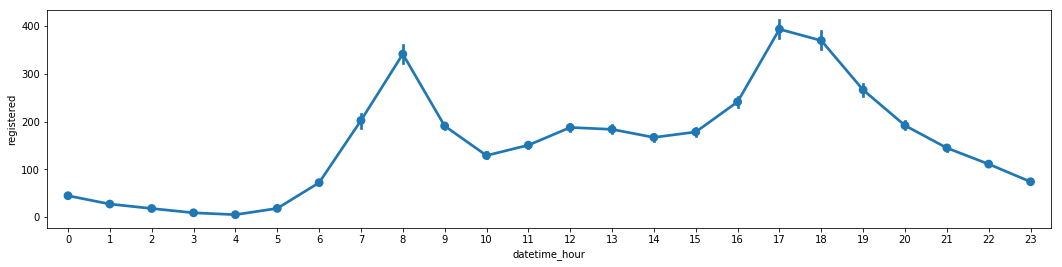

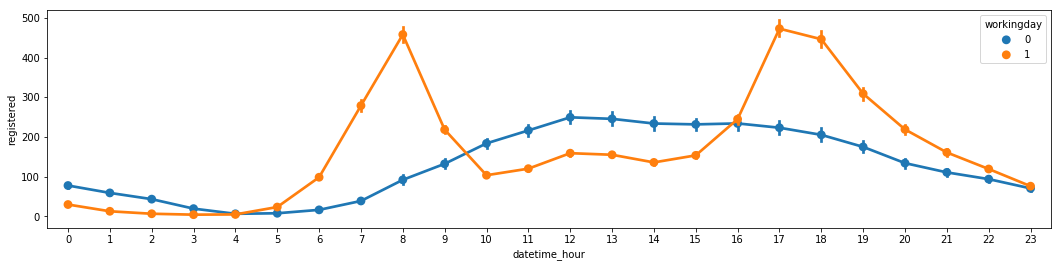

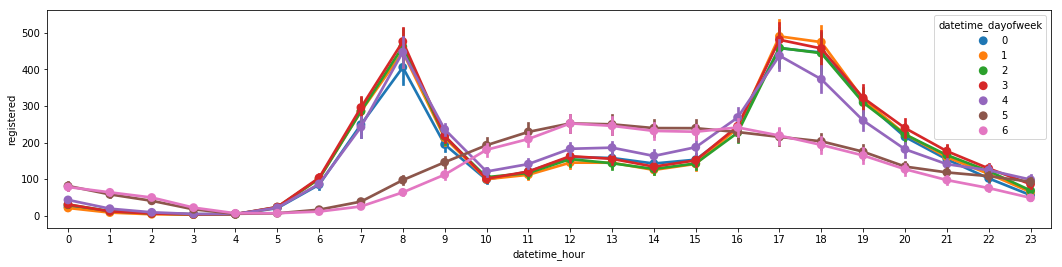

In [9]:
figure, ax1 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 4)

sns.pointplot(data = train, x = "datetime_hour", y = "registered", ax = ax1)

figure, ax2 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 4)

sns.pointplot(data = train, x = "datetime_hour", y = "registered", hue = "workingday", ax = ax2)

figure, ax3 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18, 4)

sns.pointplot(data = train, x = "datetime_hour", y = "registered", hue = "datetime_dayofweek", ax = ax3)

** Lesson Learned **

  * 주중(workingday==0)에는 출퇴근 시간에, 주말(workingday==1)에는 오후에 많이 빌린다.
  * 금요일은 주중이지만 어느정도 주말의 속성을 보유하고 있다. (출퇴근 시간에 덜 빌리고, 오후에 더 빌린다)
  * 비슷하게 월요일도 주중이되 주말의 성향을 보유하고 있다.

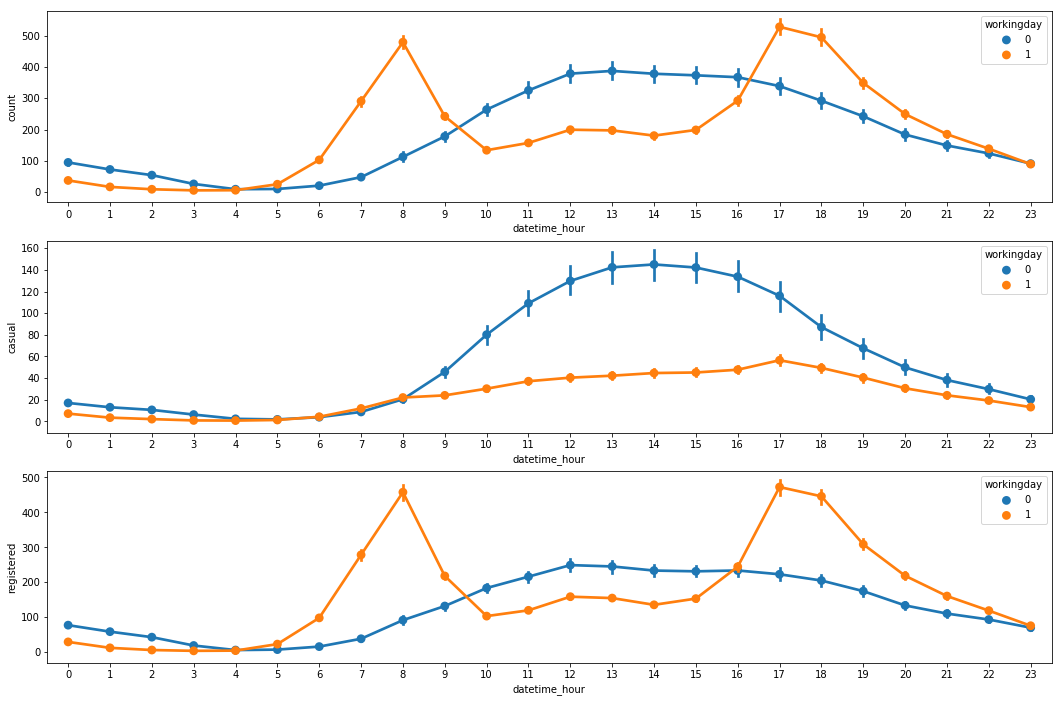

In [10]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime_hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime_hour", y="casual", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime_hour", y="registered", hue="workingday", ax=ax3)

### Concatenate year and month

In [11]:
# train["datetime-year_month"] = train["datetime-year"].astype('str') + '-' + train["datetime-month"].astype('str')


def concatenate_year_month(datetime) :
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime_year_month"] = train["datetime"].apply(concatenate_year_month)
# .apply : for문 대신해서 생긴 것이라 생각하면 되고, 10886개의 data가 함수의 변수로 들어가는 것.

print(train.shape)
train[["datetime", "datetime_year_month"]].head()

(10886, 28)


,datetime,datetime_year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [12]:
# figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# figure.set_size_inches(18, 4)

# sns.barplot(data=train, x="datetime_year", y="registered", ax=ax1)
# sns.barplot(data=train, x="datetime_month", y="registered", ax=ax2)

# figure, ax3 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18, 4)

# sns.barplot(data=train, x="datetime_year_month", y="registered", ax=ax3)

** Lesson Learned **
  * 자전거 대여량은 꾸준히 상승하고 있다.
  * 2011년 12월과 2012년 1월의 자전거 대여량은 비슷하다. 그러므로 12월이 1월보다 많이 빌린다고 볼 수는 없다.
  * 2012년은 6월에서 7월 사이 자전거 대여량이 감소하지만, 2011년은 7월부터 8월 사이에 자전거 대여량이 감소한다.

In [13]:
# figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2)
# figure.set_size_inches(18, 15)

# sns.barplot(data = train, x = "weather_1", y = "registered", ax=ax1)
# sns.barplot(data = train, x = "weather_2", y = "registered", ax=ax2)
# sns.barplot(data = train, x = "weather_3", y = "registered", ax=ax3)
# sns.barplot(data = train, x = "weather_4", y = "registered", ax=ax4)
# sns.barplot(data = train, x = "season_1", y = "registered", ax=ax5)
# sns.barplot(data = train, x = "season_2", y = "registered", ax=ax6)
# sns.barplot(data = train, x = "season_3", y = "registered", ax=ax7)
# sns.barplot(data = train, x = "season_4", y = "registered", ax=ax8)

## Train

In [191]:
# pandas notebook 에 컬럼을 추가해서 해보자 (년월일시분초 추가)

feature_names = [
    "season", 
    "weather", 
    "holiday", "workingday", 
    "temp", "atemp", "humidity",
    "datetime_year", "datetime_hour", "datetime_dayofweek"
]

feature_names

['season',
 'weather',
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'datetime_year',
 'datetime_hour',
 'datetime_dayofweek']

In [192]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 9)


,season,weather,holiday,workingday,temp,atemp,datetime_year,datetime_hour,datetime_dayofweek
0,1,1,0,0,9.84,14.395,2011,0,5
1,1,1,0,0,9.02,13.635,2011,1,5
2,1,1,0,0,9.02,13.635,2011,2,5
3,1,1,0,0,9.84,14.395,2011,3,5
4,1,1,0,0,9.84,14.395,2011,4,5


In [193]:
for f in feature_names:
    if train[f].isnull().any():
        print(f)
        print(train[train[f].isnull()])

In [194]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 9)


,season,weather,holiday,workingday,temp,atemp,datetime_year,datetime_hour,datetime_dayofweek
0,1,1,0,1,10.66,11.365,2011,0,3
1,1,1,0,1,10.66,13.635,2011,1,3
2,1,1,0,1,10.66,13.635,2011,2,3
3,1,1,0,1,10.66,12.880,2011,3,3
4,1,1,0,1,10.66,12.880,2011,4,3


In [195]:
lable_name = "registered"

Y_train = train[lable_name]

print(Y_train.shape)
Y_train.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [196]:
# Classfier <-> Regressor
# Regressor : 맞추려는 레이블이 숫자 혹은 소수점이 높은지 낮은지에 대한 것
# Classfier : 특정 카테고리 안에 들어가 있는 문제 (살았냐 죽었냐에 대한 것 같은거)

# from sklearn.tree import DecisionTreeRegressor

# ensenble : 같이 쓰는 것
# RandomForestRegressor : DecisionTree와 다르게, 데이터를 66%정도씩 n개의 tree를 만들어서 서로 비교하고 찬/반을 나눠 선택한다.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 2)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

## Score
** Score ** = Root Mean Squared Logarithmic Error, RMSLE.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [197]:
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    square_difference = difference ** 2
    mean_square_difference = square_difference.mean()
    
    score = np.sqrt(mean_square_difference)
    
    return score

print(rmsle([1, 2, 3], [1, 2, 3]))
print(rmsle([1, 2, 3], [2, 3, 4]))
print(rmsle([1, 2, 3], [1, 4, 9]))

rmsle_score = make_scorer(rmsle)
rmsle_score

0.0
0.31461933252553237
0.6056763501008297


make_scorer(rmsle)

In [198]:
# 구버전의 경우 : from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

# score = cross_val_score(model, X_train, Y_train,
#                         cv = 20, scoring = "neg_mean_absolute_error").mean() # cv : 조각 개수

# score = -1.0 * score

score = cross_val_score(model, X_train, Y_train, cv=20, scoring=rmsle_score).mean()

print("Score = {0:.5f}".format(score))

# '-'가 나오는 이유 : 무시해도 됨. 이 점수는 0에 근접할 수록 좋은거고 멀수록 안 좋은 것. +인지 -인지 상관 없음
# 점수가 다른 이유는 실행 할때마다 달라지고, DecisionTree가 랜덤으로 할당되기 때문에 점수가 다르다.(고정해주는 것이 좋다.)
# 랜덤을 고정해주는 것 -> random_state

Score = 0.36874


In [199]:
# fit 이 끝나면 predict 로 예측하는 것
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [200]:
model.predict(X_test)

# 결과가 이상하게 나옴 -> 결과를 우선 내고 고쳐나가는게 좋음

array([10.3,  5.4,  2.9, ..., 97.9, 98.4, 40.5])

In [201]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions

(6493,)


array([10.3,  5.4,  2.9, ..., 97.9, 98.4, 40.5])

## Submit

In [202]:
submission = pd.read_csv("kaggle_bike/sampleSubmission.csv")

print(submission.shape)
submission.head()

# sample이기 떄문에 count가 0 -> 우리가 예측한 값을 채워넣어주면 되는 것.

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [203]:
submission["count"] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.3
1,2011-01-20 01:00:00,5.4
2,2011-01-20 02:00:00,2.9
3,2011-01-20 03:00:00,2.0
4,2011-01-20 04:00:00,2.1


In [204]:
submission.to_csv("kaggle_bike/result_registered.csv", index = False)

# from datetime import datetime

# current_date = datetime.now()
# current_date = current_date.strftime("%Y-%m-%d_%H-%M-%S")

# description = "baseline-script"

# filename = "{date}_{score:.5f}_{desc}.csv".format(date=current_date, score=score, desc=description)
# filepath = "submissions/{filename}".format(filename=filename)

# submission.to_csv(filepath, index=False)